In [1]:
!date

Wed Aug 20 10:03:48 AM EDT 2025


In [2]:
pwd

'/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code'

In [3]:
import os
import numpy as np
import ants
from tqdm import tqdm

In [4]:
import DeepCor_utils
from DeepCor_utils import *

numpy version: 1.20.1
sklearn version: 1.3.2
torch version: 2.4.1+cu121
AntsPy version: 0.6.1


In [5]:
def get_roi_data(im_fn,roi_fn):
    roi = ants.image_read(roi_fn)
    im = ants.image_read(im_fn)

    roi_data = im.numpy()[roi.numpy()==1].mean()
    #roi_data = np.nanmean(im.numpy()[roi.numpy()==1])
    return roi_data

In [ ]:
def plot_scatter(vec1,vec2,xlabel='',ylabel='',title=''):
    plt.scatter(vec1, vec2, color='blue', label='Data points',s=150)
    f = 20
    plt.xticks(fontsize=f)
    plt.yticks(fontsize=f)

    # Adding the parity line (where y = x)
    # Determine the limits for the line based on the data range:
    min_val = min(np.min(vec1), np.min(vec2))
    max_val = max(np.max(vec1), np.max(vec2))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Parity line (y=x)')

    # Add labels and title
    plt.xlabel(xlabel,fontsize=16,fontweight='bold')
    plt.ylabel(ylabel,fontsize=16,fontweight='bold')
    plt.title(title,fontsize=16,fontweight='bold')
    plt.grid(True)

In [10]:
analysis_name = 'neurips-adversarial-ABCD-v2-beta-1e-5'
analysis_dir = os.path.join('../Data/StudyForrest/ensembles_last_CVAE/',analysis_name)
analysis_dir

'../Data/StudyForrest/ensembles_last_CVAE/neurips-adversarial-ABCD-v2-beta-1e-5'

1360


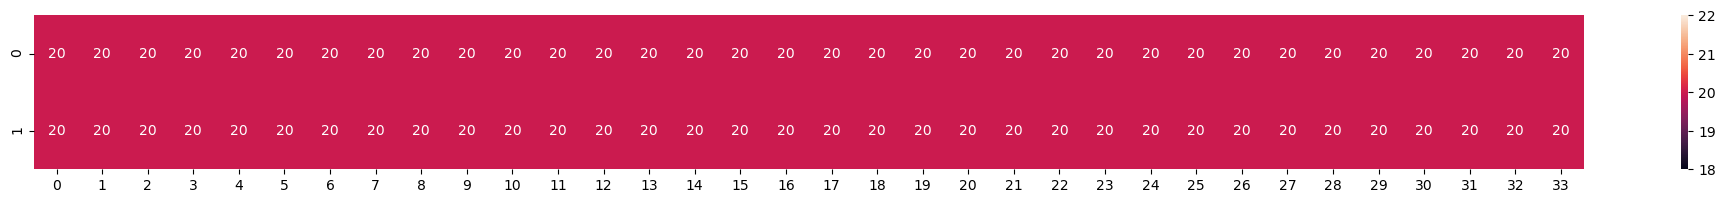

In [11]:
def get_files(s,r):
    #return [os.path.join(analysis_dir,f) for f in os.listdir(analysis_dir) if f.startswith(f'conv_denoise_signal_S{s}_R{r}_rep')]
    #return [os.path.join(analysis_dir,f) for f in os.listdir(analysis_dir) if f.startswith(f'conv_denoise_large_signal_S{s}_R{r}_rep')]
    return [os.path.join(analysis_dir,f) for f in os.listdir(analysis_dir) if f.startswith(f'conv_denoise_large_signal_S{s}_R{r}_rep')]    
check_done = np.array([[len(get_files(s,r)) for r in [1,2]] for s in np.arange(34)])
import seaborn as sns
plt.figure(figsize=(25,2))
sns.heatmap(check_done.transpose(),annot=True)
print(check_done.sum())

1360


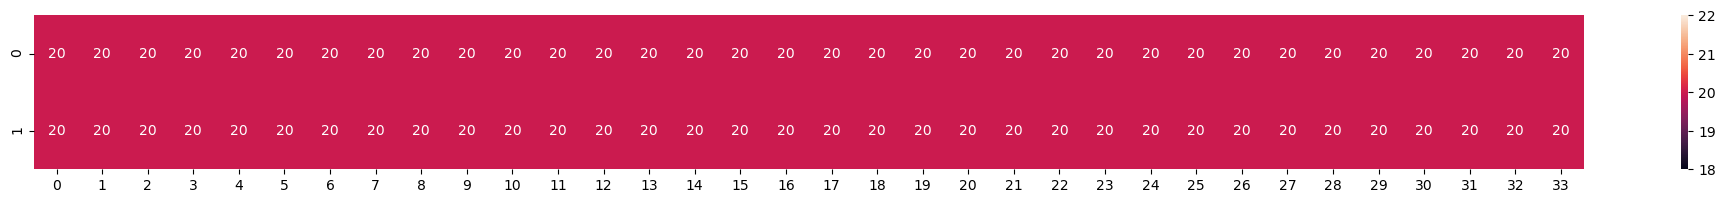

In [12]:
def get_files(s,r):
    return [os.path.join(analysis_dir,f) for f in os.listdir(analysis_dir) if f.startswith(f'conv_denoise_signal_S{s}_R{r}_rep')]
    #return [os.path.join(analysis_dir,f) for f in os.listdir(analysis_dir) if f.startswith(f'conv_denoise_large_signal_S{s}_R{r}_rep')]
    
check_done = np.array([[len(get_files(s,r)) for r in [1,2]] for s in np.arange(34)])
import seaborn as sns
plt.figure(figsize=(25,2))
sns.heatmap(check_done.transpose(),annot=True)
print(check_done.sum())

68


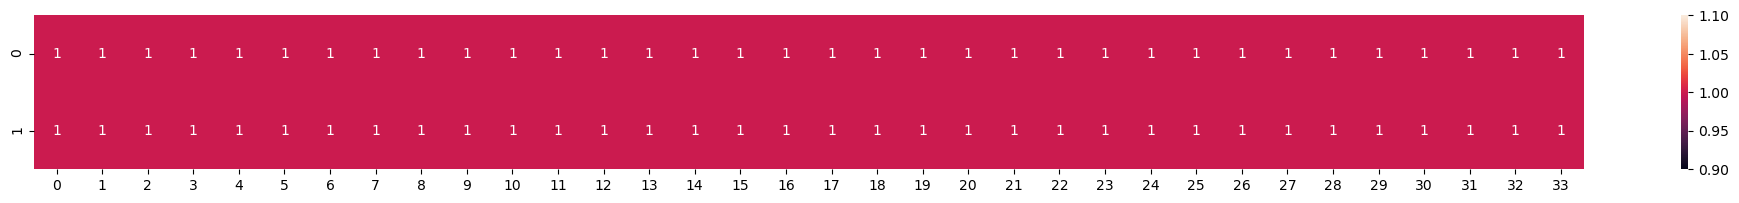

In [13]:
def get_files(s,r):
    return os.path.exists(os.path.join(analysis_dir,f'contrast_face_{s}_R{r}_conv_denoise_deepcor.nii.gz'))
    
check_done = np.array([[get_files(s,r) for r in [1,2]] for s in np.arange(34)])
import seaborn as sns
plt.figure(figsize=(25,2))
sns.heatmap(check_done.transpose(),annot=True)
print(check_done.sum())

68


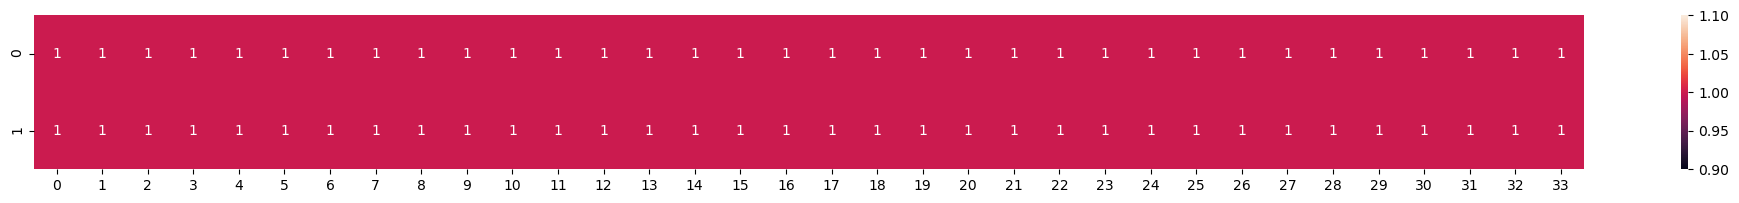

In [14]:
def get_files(s,r):
    return os.path.exists(os.path.join(analysis_dir,f'contrast_face_{s}_R{r}_conv_denoise_large_deepcor.nii.gz'))
    
check_done = np.array([[get_files(s,r) for r in [1,2]] for s in np.arange(34)])
import seaborn as sns
plt.figure(figsize=(25,2))
sns.heatmap(check_done.transpose(),annot=True)
print(check_done.sum())

68


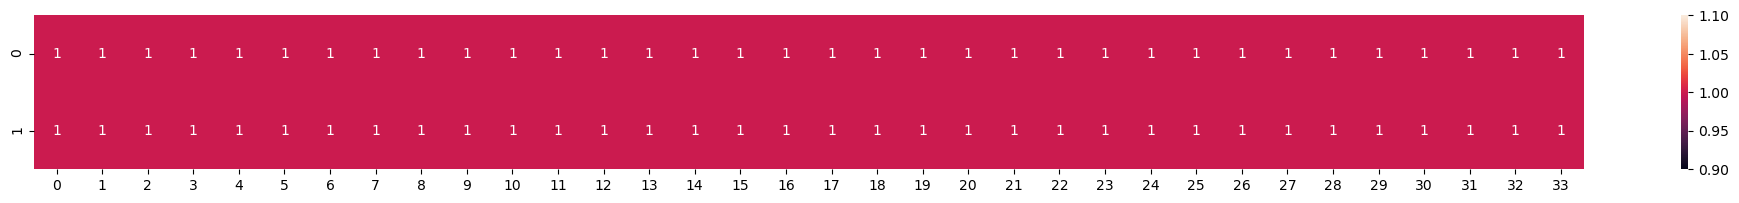

In [15]:
def get_files(s,r):
    return os.path.exists(os.path.join(analysis_dir,f'contrast_face_{s}_R{r}_conv_denoise_deepcor.nii.gz'))
    
check_done = np.array([[get_files(s,r) for r in [1,2]] for s in np.arange(34)])
import seaborn as sns
plt.figure(figsize=(25,2))
sns.heatmap(check_done.transpose(),annot=True)
print(check_done.sum())

In [76]:
analysis_name = 'neurips-adversarial-things-v3-beta-1e-5'
analysis_dir = os.path.join('../Data/StudyForrest/ensembles_last_CVAE/',analysis_name)
analysis_dir

'../Data/StudyForrest/ensembles_last_CVAE/neurips-adversarial-things-v3-beta-1e-5'

360


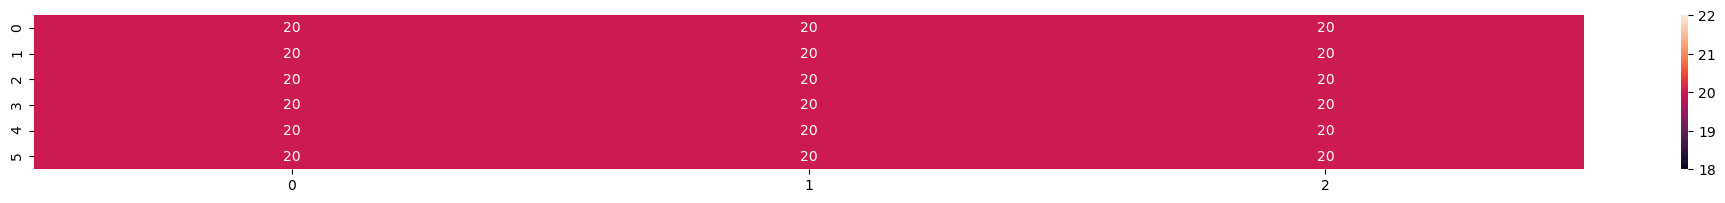

In [77]:
def get_files(s,r):
    return [os.path.join(analysis_dir,f) for f in os.listdir(analysis_dir) if f.startswith(f'conv_denoise_signal_S{s}_R{r}_rep')]
    #return [os.path.join(analysis_dir,f) for f in os.listdir(analysis_dir) if f.startswith(f'conv_denoise_large_signal_S{s}_R{r}_rep')]
    
check_done = np.array([[len(get_files(s,r)) for r in [1,2,3,4,5,6]] for s in np.arange(3)])
import seaborn as sns
plt.figure(figsize=(25,2))
sns.heatmap(check_done.transpose(),annot=True)
print(check_done.sum())

360


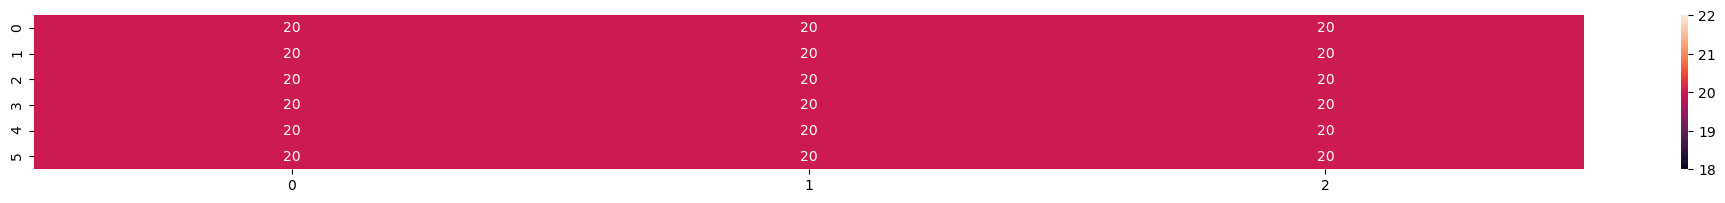

In [80]:
def get_files(s,r):
    #return [os.path.join(analysis_dir,f) for f in os.listdir(analysis_dir) if f.startswith(f'conv_denoise_signal_S{s}_R{r}_rep')]
    return [os.path.join(analysis_dir,f) for f in os.listdir(analysis_dir) if f.startswith(f'conv_denoise_large_signal_S{s}_R{r}_rep')]
    
check_done = np.array([[len(get_files(s,r)) for r in [1,2,3,4,5,6]] for s in np.arange(3)])
import seaborn as sns
plt.figure(figsize=(25,2))
sns.heatmap(check_done.transpose(),annot=True)
print(check_done.sum())

In [16]:
#BC-ABCD-denoise/Data/StudyForrest/ensembles_last_CVAE/neurips-adversarial-forrest-v1-beta-1e-5/contrast_place_S9_R4_conv_denoise_large_preproc.nii.gz

In [13]:
analysis_name = 'neurips-adversarial-forrest-v1-beta-1e-5'
analysis_dir = os.path.join('../Data/StudyForrest/ensembles_last_CVAE/',analysis_name)
analysis_dir

'../Data/StudyForrest/ensembles_last_CVAE/neurips-adversarial-forrest-v1-beta-1e-5'

1120


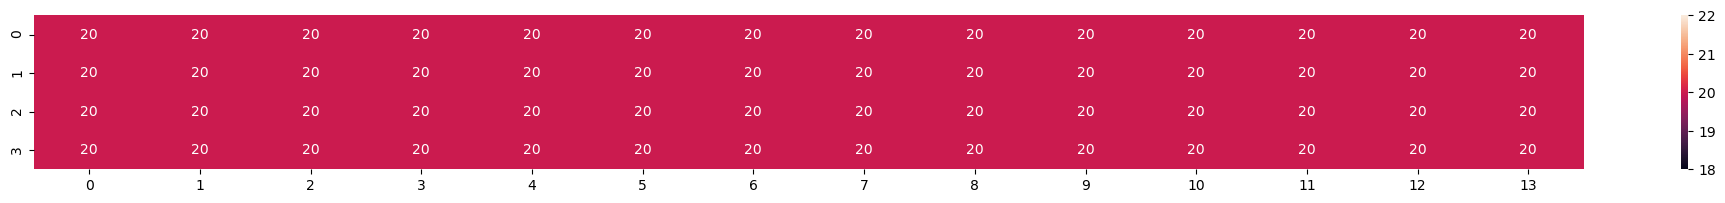

In [15]:
def get_files(s,r):
    #return [os.path.join(analysis_dir,f) for f in os.listdir(analysis_dir) if f.startswith(f'conv_denoise_signal_S{s}_R{r}_rep')]
    return [os.path.join(analysis_dir,f) for f in os.listdir(analysis_dir) if f.startswith(f'conv_denoise_large_signal_S{s}_R{r}_rep')]
    
check_done = np.array([[len(get_files(s,r)) for r in [1,2,3,4]] for s in np.arange(14)])
import seaborn as sns
plt.figure(figsize=(25,2))
sns.heatmap(check_done.transpose(),annot=True)
print(check_done.sum())

In [118]:
analysis_name = 'neurips-adversarial-forrest-v1-beta-1e-5'
analysis_dir = os.path.join('../Data/StudyForrest/ensembles_last_CVAE/',analysis_name)
analysis_dir

'../Data/StudyForrest/ensembles_last_CVAE/neurips-adversarial-forrest-v1-beta-1e-5'

In [119]:
subs = ['sub-01','sub-02','sub-03','sub-04','sub-05','sub-09','sub-10','sub-14','sub-15','sub-16','sub-17','sub-18','sub-19','sub-20']
rvec=[1,2,3,4]
svec=np.arange(14)

In [120]:
ffa_roi = '../Data/StudyForrest/ROIs/rFFA_final_mask_{sub}_bin.nii.gz'
ppa_roi = '../Data/StudyForrest/ROIs/rPPA_final_mask_{sub}_bin.nii.gz'

In [121]:
aname = 'conv_denoise_large'
#fn = os.path.join(analysis_dir,'contrast_place_S{s}_R{r}_{aname}_deepcor.nii.gz')
fn = os.path.join(analysis_dir,'contrast_face_{s}_R{r}_{aname}_deepcor.nii.gz')
#assert np.array([[os.path.exists(fn.format(s=s,r=r,aname=aname)) for r in rvec] for s in svec]).mean()==1.0
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ffa_roi.format(sub=subs[s])) for r in rvec] for s in svec])
res.mean()

1.7247547

In [122]:
aname = 'conv_denoise'
fn = os.path.join(analysis_dir,'contrast_face_{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ffa_roi.format(sub=subs[s])) for r in rvec] for s in svec])
np.save(file=f'../Data/contrast_face-{analysis_name}_{aname}.npy',arr=res)
print(f'contrast face: {res.mean():.2f}')

fn = os.path.join(analysis_dir,'corr2face_S{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ffa_roi.format(sub=subs[s])) for r in rvec] for s in svec])
np.save(file=f'../Data/corr2face-{analysis_name}_{aname}.npy',arr=res)
print(f'corr2face: {res.mean():.2f}')

fn = os.path.join(analysis_dir,'contrast_place_S{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ppa_roi.format(sub=subs[s])) for r in rvec] for s in svec])
np.save(file=f'../Data/contrast_place-{analysis_name}_{aname}.npy',arr=res)
print(f'contrast place: {res.mean():.2f}')

fn = os.path.join(analysis_dir,'corr2place_S{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ppa_roi.format(sub=subs[s])) for r in rvec] for s in svec])
np.save(file=f'../Data/corr2place-{analysis_name}_{aname}.npy',arr=res)
print(f'corr2place: {res.mean():.2f}')

contrast face: 1.81
corr2face: 0.15
contrast place: 2.29
corr2place: 0.25


In [123]:
aname = 'conv_denoise_large'
fn = os.path.join(analysis_dir,'contrast_face_{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ffa_roi.format(sub=subs[s])) for r in rvec] for s in svec])
np.save(file=f'../Data/contrast_face-{analysis_name}_{aname}.npy',arr=res)
print(f'contrast face: {res.mean():.2f}')

fn = os.path.join(analysis_dir,'corr2face_S{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ffa_roi.format(sub=subs[s])) for r in rvec] for s in svec])
np.save(file=f'../Data/corr2face-{analysis_name}_{aname}.npy',arr=res)
print(f'corr2face: {res.mean():.2f}')

fn = os.path.join(analysis_dir,'contrast_place_S{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ppa_roi.format(sub=subs[s])) for r in rvec] for s in svec])
np.save(file=f'../Data/contrast_place-{analysis_name}_{aname}.npy',arr=res)
print(f'contrast place: {res.mean():.2f}')

fn = os.path.join(analysis_dir,'corr2place_S{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ppa_roi.format(sub=subs[s])) for r in rvec] for s in svec])
np.save(file=f'../Data/corr2place-{analysis_name}_{aname}.npy',arr=res)
print(f'corr2place: {res.mean():.2f}')

contrast face: 1.72
corr2face: 0.14
contrast place: 2.19
corr2place: 0.24


In [124]:
def get_roi_data(im_fn,roi_fn):
    roi = ants.image_read(roi_fn)
    im = ants.image_read(im_fn)

    roi_data = im.numpy()[roi.numpy()==1].mean()
    #roi_data = np.nanmean(im.numpy()[roi.numpy()==1])
    return roi_data

In [125]:
analysis_name = 'neurips-adversarial-ABCD-v2-beta-1e-5'
analysis_dir = os.path.join('../Data/StudyForrest/ensembles_last_CVAE/',analysis_name)

In [126]:
indir = '../Data/020-fmriprepped'
subs = [s for s in os.listdir(indir) if all((s.startswith('sub'),not s.endswith('.html')))]
subs.sort()
len(subs)

34

In [127]:
ffa_roi = '../Data/ABCD-indiv-ROIs/FFA-ROI-S{s}.nii'
ppa_roi = '../Data/ABCD-indiv-ROIs/PPA-ROI-S{s}.nii'

In [128]:
s = 0
r = 1
aname = 'conv_denoise'
fn = os.path.join(analysis_dir,'contrast_face_{s}_R{r}_{aname}_deepcor.nii.gz')

#[[os.path.exists(fn.format(s=s,r=r,aname=aname)) for r in [1,2]] for s in range(34)]

In [129]:
rvec = [1,2]
svec = np.arange(33)

In [130]:
aname = 'conv_denoise'
fn = os.path.join(analysis_dir,'contrast_face_{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ffa_roi.format(s=s)) for r in rvec] for s in svec])
np.save(file=f'../Data/contrast_face-{analysis_name}_{aname}.npy',arr=res)
print(f'contrast face: {res.mean():.2f}')

fn = os.path.join(analysis_dir,'corr2face_S{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ffa_roi.format(s=s)) for r in rvec] for s in svec])
np.save(file=f'../Data/corr2face-{analysis_name}_{aname}.npy',arr=res)
print(f'corr2face: {res.mean():.2f}')

fn = os.path.join(analysis_dir,'contrast_place_S{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ppa_roi.format(s=s)) for r in rvec] for s in svec])
np.save(file=f'../Data/contrast_place-{analysis_name}_{aname}.npy',arr=res)
print(f'contrast place: {res.mean():.2f}')

fn = os.path.join(analysis_dir,'corr2place_S{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ppa_roi.format(s=s)) for r in rvec] for s in svec])
np.save(file=f'../Data/corr2place-{analysis_name}_{aname}.npy',arr=res)
print(f'corr2place: {res.mean():.2f}')

contrast face: 4.16
corr2face: 0.18
contrast place: 8.73
corr2place: 0.38


In [131]:
aname = 'conv_denoise_large'
fn = os.path.join(analysis_dir,'contrast_face_{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ffa_roi.format(s=s)) for r in rvec] for s in svec])
np.save(file=f'../Data/contrast_face-{analysis_name}_{aname}.npy',arr=res)
print(f'contrast face: {res.mean():.2f}')

fn = os.path.join(analysis_dir,'corr2face_S{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ffa_roi.format(s=s)) for r in rvec] for s in svec])
np.save(file=f'../Data/corr2face-{analysis_name}_{aname}.npy',arr=res)
print(f'corr2face: {res.mean():.2f}')

fn = os.path.join(analysis_dir,'contrast_place_S{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ppa_roi.format(s=s)) for r in rvec] for s in svec])
np.save(file=f'../Data/contrast_place-{analysis_name}_{aname}.npy',arr=res)
print(f'contrast place: {res.mean():.2f}')

fn = os.path.join(analysis_dir,'corr2place_S{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ppa_roi.format(s=s)) for r in rvec] for s in svec])
np.save(file=f'../Data/corr2place-{analysis_name}_{aname}.npy',arr=res)
print(f'corr2place: {res.mean():.2f}')

contrast face: 4.04
corr2face: 0.17
contrast place: 8.46
corr2place: 0.37


In [132]:
analysis_name = 'neurips-adversarial-things-v3-beta-1e-5'
analysis_dir = os.path.join('../Data/StudyForrest/ensembles_last_CVAE/',analysis_name)
subs = ['sub-01','sub-02','sub-03']
analysis_dir

'../Data/StudyForrest/ensembles_last_CVAE/neurips-adversarial-things-v3-beta-1e-5'

In [133]:
ffa_roi = '../Data/things/ROIs-indiv/FFA-ROI-S{s}.nii'
ppa_roi = '../Data/things/ROIs-indiv/PPA-ROI-S{s}.nii'

In [134]:
rvec = [1,2,3,4,5,6]
svec = np.arange(3)

In [135]:
aname = 'conv_denoise'
fn = os.path.join(analysis_dir,'contrast_face_{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ffa_roi.format(s=s)) for r in rvec] for s in svec])
np.save(file=f'../Data/contrast_face-{analysis_name}_{aname}.npy',arr=res)
print(f'contrast face: {res.mean():.2f}')

fn = os.path.join(analysis_dir,'corr2face_S{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ffa_roi.format(s=s)) for r in rvec] for s in svec])
np.save(file=f'../Data/corr2face-{analysis_name}_{aname}.npy',arr=res)
print(f'corr2face: {res.mean():.2f}')

fn = os.path.join(analysis_dir,'contrast_place_S{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ppa_roi.format(s=s)) for r in rvec] for s in svec])
np.save(file=f'../Data/contrast_place-{analysis_name}_{aname}.npy',arr=res)
print(f'contrast place: {res.mean():.2f}')

fn = os.path.join(analysis_dir,'corr2place_S{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ppa_roi.format(s=s)) for r in rvec] for s in svec])
np.save(file=f'../Data/corr2place-{analysis_name}_{aname}.npy',arr=res)
print(f'corr2place: {res.mean():.2f}')

contrast face: 3.14
corr2face: 0.25
contrast place: 4.26
corr2place: 0.29


In [136]:
aname = 'conv_denoise_large'
fn = os.path.join(analysis_dir,'contrast_face_{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ffa_roi.format(s=s)) for r in rvec] for s in svec])
np.save(file=f'../Data/contrast_face-{analysis_name}_{aname}.npy',arr=res)
print(f'contrast face: {res.mean():.2f}')

fn = os.path.join(analysis_dir,'corr2face_S{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ffa_roi.format(s=s)) for r in rvec] for s in svec])
np.save(file=f'../Data/corr2face-{analysis_name}_{aname}.npy',arr=res)
print(f'corr2face: {res.mean():.2f}')

fn = os.path.join(analysis_dir,'contrast_place_S{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ppa_roi.format(s=s)) for r in rvec] for s in svec])
np.save(file=f'../Data/contrast_place-{analysis_name}_{aname}.npy',arr=res)
print(f'contrast place: {res.mean():.2f}')

fn = os.path.join(analysis_dir,'corr2place_S{s}_R{r}_{aname}_deepcor.nii.gz')
res = np.array([[get_roi_data(fn.format(s=s,r=r,aname=aname),ppa_roi.format(s=s)) for r in rvec] for s in svec])
np.save(file=f'../Data/corr2place-{analysis_name}_{aname}.npy',arr=res)
print(f'corr2place: {res.mean():.2f}')

contrast face: 3.00
corr2face: 0.24
contrast place: 4.02
corr2place: 0.28


In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from scipy.stats import ttest_rel,ttest_ind

def pretty_ttest_rel(v1,v2,ttl='',alternative='two-sided'):
    #ttl = 'adv>large: '
    delta = v1.mean()-v2.mean()
    degf = len(v1)-1
    t,p = ttest_rel(v1,v2,alternative=alternative)

    if p<.001:
        print(f'{ttl}ΔM={delta:.2f}, t({degf}) = {t:.2f} , p < .001')
    else:
        print(f'{ttl}ΔM={delta:.2f}, t({degf}) = {t:.2f} , p = {p:.03}')


def pretty_ttest_ind(v1,v2,ttl='',alternative='two-sided'):
    #ttl = 'adv>large: '
    delta = v1.mean()-v2.mean()
    degf = len(v1)-1
    t,p = ttest_rl(v1,v2,alternative=alternative)

    if p<.001:
        print(f'{ttl}ΔM={delta:.2f}, t({degf}) = {t:.2f} , p < .001')
    else:
        print(f'{ttl}ΔM={delta:.2f}, t({degf}) = {t:.2f} , p = {p:.03}')

In [3]:
## Forrest
res_forrest = {}
res_forrest['contrast_face_preproc'] = np.load('../Data/betas_forrest_face_DeepCor-forrest-v4-beta-1e-5.npy')[:,:,0]
res_forrest['contrast_face_compcor'] = np.load('../Data/betas_forrest_face_DeepCor-forrest-v4-beta-1e-5.npy')[:,:,1]
res_forrest['contrast_face_deepcor_gen_v1'] = np.load('../Data/betas_forrest_face_refac-baseline-forrest-beta-1e-5.npy')[:,:,2]
res_forrest['contrast_face_deepcor_gen_v2'] = np.load('../Data/betas_forrest_face_DeepCor-forrest-v4-beta-1e-5.npy')[:,:,2]
res_forrest['contrast_face_adv'] = np.load('../Data/contrast_face-neurips-adversarial-forrest-v1-beta-1e-5_conv_denoise.npy').transpose()
res_forrest['contrast_face_adv_large'] = np.load('../Data/contrast_face-neurips-adversarial-forrest-v1-beta-1e-5_conv_denoise_large.npy').transpose()

res_forrest['contrast_place_preproc'] = np.load('../Data/betas_forrest_place_DeepCor-forrest-v4-beta-1e-5.npy')[:,:,0]
res_forrest['contrast_place_compcor'] = np.load('../Data/betas_forrest_place_DeepCor-forrest-v4-beta-1e-5.npy')[:,:,1]
res_forrest['contrast_place_deepcor_gen_v1'] = np.load('../Data/betas_forrest_place_refac-baseline-forrest-beta-1e-5.npy')[:,:,2]
res_forrest['contrast_place_deepcor_gen_v2'] = np.load('../Data/betas_forrest_place_DeepCor-forrest-v4-beta-1e-5.npy')[:,:,2]
res_forrest['contrast_place_adv'] = np.load('../Data/contrast_place-neurips-adversarial-forrest-v1-beta-1e-5_conv_denoise.npy').transpose()
res_forrest['contrast_place_adv_large'] = np.load('../Data/contrast_place-neurips-adversarial-forrest-v1-beta-1e-5_conv_denoise_large.npy').transpose()

res_forrest['corr_face_preproc'] = np.load('../Data/corr2face_forrest_DeepCor-forrest-v4-beta-1e-5.npy')[:,:,0]
res_forrest['corr_face_compcor'] = np.load('../Data/corr2face_forrest_DeepCor-forrest-v4-beta-1e-5.npy')[:,:,1]
res_forrest['corr_face_deepcor_gen_v1'] = np.load('../Data/corr2face_forrest_refac-baseline-forrest-beta-1e-5.npy')[:,:,2]
res_forrest['corr_face_deepcor_gen_v2'] = np.load('../Data/corr2face_forrest_DeepCor-forrest-v4-beta-1e-5.npy')[:,:,2]
res_forrest['corr_face_adv'] = np.load('../Data/corr2face-neurips-adversarial-forrest-v1-beta-1e-5_conv_denoise.npy').transpose()
res_forrest['corr_face_adv_large'] = np.load('../Data/corr2face-neurips-adversarial-forrest-v1-beta-1e-5_conv_denoise_large.npy').transpose()

res_forrest['corr_place_preproc'] = np.load('../Data/corr2place_forrest_DeepCor-forrest-v4-beta-1e-5.npy')[:,:,0]
res_forrest['corr_place_compcor'] = np.load('../Data/corr2place_forrest_DeepCor-forrest-v4-beta-1e-5.npy')[:,:,1]
res_forrest['corr_place_deepcor_gen_v1'] = np.load('../Data/corr2place_forrest_refac-baseline-forrest-beta-1e-5.npy')[:,:,2]
res_forrest['corr_place_deepcor_gen_v2'] = np.load('../Data/corr2place_forrest_DeepCor-forrest-v4-beta-1e-5.npy')[:,:,2]
res_forrest['corr_place_adv'] = np.load('../Data/corr2place-neurips-adversarial-forrest-v1-beta-1e-5_conv_denoise.npy').transpose()
res_forrest['corr_place_adv_large'] = np.load('../Data/corr2place-neurips-adversarial-forrest-v1-beta-1e-5_conv_denoise_large.npy').transpose()

In [4]:
# ABCD 
res_ABCD = {}
res_ABCD['contrast_face_preproc'] = np.load('../Data/contrast_face_DeepCor-ABCD-nopreclean-beta-1e-5.npy')[:,:,0]
res_ABCD['contrast_face_compcor'] = np.load('../Data/contrast_face_DeepCor-ABCD-nopreclean-beta-1e-5.npy')[:,:,1]
res_ABCD['contrast_face_deepcor_gen_v1'] = np.load('../Data/contrast_face_162-refac-baseline-1-ABCD-beta-1e-5.npy')[:,:,2]
res_ABCD['contrast_face_deepcor_gen_v2'] = np.load('../Data/contrast_face_DeepCor-ABCD-nopreclean-beta-1e-5.npy')[:,:,2]
res_ABCD['contrast_face_adv'] = np.load('../Data/contrast_face-neurips-adversarial-ABCD-v2-beta-1e-5_conv_denoise.npy').transpose()
res_ABCD['contrast_face_adv_large'] = np.load('../Data/contrast_face-neurips-adversarial-ABCD-v2-beta-1e-5_conv_denoise_large.npy').transpose()

res_ABCD['contrast_place_preproc'] = np.load('../Data/contrast_place_DeepCor-ABCD-nopreclean-beta-1e-5.npy')[:,:,0]
res_ABCD['contrast_place_compcor'] = np.load('../Data/contrast_place_DeepCor-ABCD-nopreclean-beta-1e-5.npy')[:,:,1]
res_ABCD['contrast_place_deepcor_gen_v1'] = np.load('../Data/contrast_place_162-refac-baseline-1-ABCD-beta-1e-5.npy')[:,:,2]
res_ABCD['contrast_place_deepcor_gen_v2'] = np.load('../Data/contrast_place_DeepCor-ABCD-nopreclean-beta-1e-5.npy')[:,:,2]
res_ABCD['contrast_place_adv'] = np.load('../Data/contrast_place-neurips-adversarial-ABCD-v2-beta-1e-5_conv_denoise.npy').transpose()
res_ABCD['contrast_place_adv_large'] = np.load('../Data/contrast_place-neurips-adversarial-ABCD-v2-beta-1e-5_conv_denoise_large.npy').transpose()

res_ABCD['corr_face_preproc'] = np.load('../Data/corr2face_DeepCor-ABCD-nopreclean-beta-1e-5.npy')[:,:,0]
res_ABCD['corr_face_compcor'] = np.load('../Data/corr2face_DeepCor-ABCD-nopreclean-beta-1e-5.npy')[:,:,1]
res_ABCD['corr_face_deepcor_gen_v1'] = np.load('../Data/corr2face_162-refac-baseline-1-ABCD-beta-1e-5.npy')[:,:,2]
res_ABCD['corr_face_deepcor_gen_v2'] = np.load('../Data/corr2face_DeepCor-ABCD-nopreclean-beta-1e-5.npy')[:,:,2]
res_ABCD['corr_face_adv'] = np.load('../Data/corr2face-neurips-adversarial-ABCD-v2-beta-1e-5_conv_denoise.npy').transpose()
res_ABCD['corr_face_adv_large'] = np.load('../Data/corr2face-neurips-adversarial-ABCD-v2-beta-1e-5_conv_denoise_large.npy').transpose()

res_ABCD['corr_place_preproc'] = np.load('../Data/corr2place_DeepCor-ABCD-nopreclean-beta-1e-5.npy')[:,:,0]
res_ABCD['corr_place_compcor'] = np.load('../Data/corr2place_DeepCor-ABCD-nopreclean-beta-1e-5.npy')[:,:,1]
res_ABCD['corr_place_deepcor_gen_v1'] = np.load('../Data/corr2place_162-refac-baseline-1-ABCD-beta-1e-5.npy')[:,:,2]
res_ABCD['corr_place_deepcor_gen_v2'] = np.load('../Data/corr2place_DeepCor-ABCD-nopreclean-beta-1e-5.npy')[:,:,2]
res_ABCD['corr_place_adv'] = np.load('../Data/corr2place-neurips-adversarial-ABCD-v2-beta-1e-5_conv_denoise.npy').transpose()
res_ABCD['corr_place_adv_large'] = np.load('../Data/corr2place-neurips-adversarial-ABCD-v2-beta-1e-5_conv_denoise_large.npy').transpose()

In [5]:
# ABCD 
res_things = {}
res_things['contrast_face_preproc'] = np.load('../Data/contrast_face_DeepCor-things-nopreclean-beta-1e-5.npy')[:,:,0]
res_things['contrast_face_compcor'] = np.load('../Data/contrast_face_DeepCor-things-nopreclean-beta-1e-5.npy')[:,:,1]
res_things['contrast_face_deepcor_gen_v1'] = np.load('../Data/contrast_face_162-refac-baseline-1-THINGS-beta-1e-5.npy')[:,:,2]
res_things['contrast_face_deepcor_gen_v2'] = np.load('../Data/contrast_face_DeepCor-things-nopreclean-beta-1e-5.npy')[:,:,2]
res_things['contrast_face_adv'] = np.load('../Data/contrast_face-neurips-adversarial-things-v3-beta-1e-5_conv_denoise.npy').transpose()
res_things['contrast_face_adv_large'] = np.load('../Data/contrast_face-neurips-adversarial-things-v3-beta-1e-5_conv_denoise_large.npy').transpose()

res_things['contrast_place_preproc'] = np.load('../Data/contrast_place_DeepCor-things-nopreclean-beta-1e-5.npy')[:,:,0]
res_things['contrast_place_compcor'] = np.load('../Data/contrast_place_DeepCor-things-nopreclean-beta-1e-5.npy')[:,:,1]
res_things['contrast_place_deepcor_gen_v1'] = np.load('../Data/contrast_place_162-refac-baseline-1-THINGS-beta-1e-5.npy')[:,:,2]
res_things['contrast_place_deepcor_gen_v2'] = np.load('../Data/contrast_place_DeepCor-things-nopreclean-beta-1e-5.npy')[:,:,2]
res_things['contrast_place_adv'] = np.load('../Data/contrast_place-neurips-adversarial-things-v3-beta-1e-5_conv_denoise.npy').transpose()
res_things['contrast_place_adv_large'] = np.load('../Data/contrast_place-neurips-adversarial-things-v3-beta-1e-5_conv_denoise_large.npy').transpose()

res_things['corr_face_preproc'] = np.load('../Data/corr2face_DeepCor-things-nopreclean-beta-1e-5.npy')[:,:,0]
res_things['corr_face_compcor'] = np.load('../Data/corr2face_DeepCor-things-nopreclean-beta-1e-5.npy')[:,:,1]
res_things['corr_face_deepcor_gen_v1'] = np.load('../Data/corr2face_162-refac-baseline-1-THINGS-beta-1e-5.npy')[:,:,2]
res_things['corr_face_deepcor_gen_v2'] = np.load('../Data/corr2face_DeepCor-things-nopreclean-beta-1e-5.npy')[:,:,2]
res_things['corr_face_adv'] = np.load('../Data/corr2face-neurips-adversarial-things-v3-beta-1e-5_conv_denoise.npy').transpose()
res_things['corr_face_adv_large'] = np.load('../Data/corr2face-neurips-adversarial-things-v3-beta-1e-5_conv_denoise_large.npy').transpose()

res_things['corr_place_preproc'] = np.load('../Data/corr2place_DeepCor-things-nopreclean-beta-1e-5.npy')[:,:,0]
res_things['corr_place_compcor'] = np.load('../Data/corr2place_DeepCor-things-nopreclean-beta-1e-5.npy')[:,:,1]
res_things['corr_place_deepcor_gen_v1'] = np.load('../Data/corr2place_162-refac-baseline-1-THINGS-beta-1e-5.npy')[:,:,2]
res_things['corr_place_deepcor_gen_v2'] = np.load('../Data/corr2place_DeepCor-things-nopreclean-beta-1e-5.npy')[:,:,2]
res_things['corr_place_adv'] = np.load('../Data/corr2place-neurips-adversarial-things-v3-beta-1e-5_conv_denoise.npy').transpose()
res_things['corr_place_adv_large'] = np.load('../Data/corr2place-neurips-adversarial-things-v3-beta-1e-5_conv_denoise_large.npy').transpose()

In [ ]:
res_forrest['contrast_avg_preproc'] = np.array([res_forrest['contrast_face_preproc'],res_forrest['contrast_place_preproc']]).mean(axis=0)
res_forrest['contrast_avg_compcor'] = np.array([res_forrest['contrast_face_compcor'],res_forrest['contrast_place_compcor']]).mean(axis=0)
res_forrest['contrast_avg_deepcor_gen_v2'] = np.array([res_forrest['contrast_face_deepcor_gen_v2'],res_forrest['contrast_place_deepcor_gen_v2']]).mean(axis=0)

res_ABCD['contrast_avg_deepcor_gen_v2'] = np.array([res_ABCD['contrast_face_deepcor_gen_v2'],res_ABCD['contrast_place_deepcor_gen_v2']]).mean(axis=0)
res_ABCD['contrast_avg_compcor'] = np.array([res_ABCD['contrast_face_compcor'],res_ABCD['contrast_place_compcor']]).mean(axis=0)
res_ABCD['contrast_avg_preproc'] = np.array([res_ABCD['contrast_face_preproc'],res_ABCD['contrast_place_preproc']]).mean(axis=0)

res_things['contrast_avg_deepcor_gen_v2'] = np.array([res_things['contrast_face_deepcor_gen_v2'],res_things['contrast_place_deepcor_gen_v2']]).mean(axis=0)
res_things['contrast_avg_compcor'] = np.array([res_things['contrast_face_compcor'],res_things['contrast_place_compcor']]).mean(axis=0)
res_things['contrast_avg_preproc'] = np.array([res_things['contrast_face_preproc'],res_things['contrast_place_preproc']]).mean(axis=0)


res_forrest['corr_avg_deepcor_gen_v2'] = np.array([res_forrest['corr_face_deepcor_gen_v2'],res_forrest['corr_place_deepcor_gen_v2']]).mean(axis=0)
res_forrest['corr_avg_compcor'] = np.array([res_forrest['corr_face_compcor'],res_forrest['corr_place_compcor']]).mean(axis=0)
res_forrest['corr_avg_preproc'] = np.array([res_forrest['corr_face_preproc'],res_forrest['corr_place_preproc']]).mean(axis=0)

res_ABCD['corr_avg_deepcor_gen_v2'] = np.array([res_ABCD['corr_face_deepcor_gen_v2'],res_ABCD['corr_place_deepcor_gen_v2']]).mean(axis=0)
res_ABCD['corr_avg_compcor'] = np.array([res_ABCD['corr_face_compcor'],res_ABCD['corr_place_compcor']]).mean(axis=0)
res_ABCD['corr_avg_preproc'] = np.array([res_ABCD['corr_face_preproc'],res_ABCD['corr_place_preproc']]).mean(axis=0)

res_things['corr_avg_deepcor_gen_v2'] = np.array([res_things['corr_face_deepcor_gen_v2'],res_things['corr_place_deepcor_gen_v2']]).mean(axis=0)
res_things['corr_avg_compcor'] = np.array([res_things['corr_face_compcor'],res_things['corr_place_compcor']]).mean(axis=0)
res_things['corr_avg_preproc'] = np.array([res_things['corr_face_preproc'],res_things['corr_place_preproc']]).mean(axis=0)

In [6]:
v1 = res_forrest['contrast_face_deepcor_gen_v2'].mean(axis=0)
v2 = res_forrest['contrast_face_compcor'].mean(axis=0)
pretty_ttest_rel(v1,v2,ttl='',alternative='greater')
print(v1.mean().round(2))

v1 = res_ABCD['contrast_face_deepcor_gen_v2'].mean(axis=0)
v2 = res_ABCD['contrast_face_compcor'].mean(axis=0)
pretty_ttest_rel(v1,v2,ttl='',alternative='greater')
print(v1.mean().round(2))

v1 = res_things['contrast_face_deepcor_gen_v2'].mean(axis=0)
v2 = res_things['contrast_face_compcor'].mean(axis=0)
pretty_ttest_rel(v1,v2,ttl='',alternative='greater')
print(v1.mean().round(2))

ΔM=0.43, t(13) = 2.08 , p = 0.029
2.36
ΔM=0.63, t(32) = 1.81 , p = 0.0401
5.3
ΔM=1.29, t(2) = 1.46 , p = 0.14
4.32


In [196]:
v1 = res_forrest['contrast_avg_deepcor_gen_v2'].mean(axis=0)
v2 = res_forrest['contrast_avg_compcor'].mean(axis=0)
pretty_ttest_rel(v1,v2,ttl='',alternative='greater')
print(v1.mean().round(2))

v1 = res_ABCD['contrast_avg_deepcor_gen_v2'].mean(axis=0)
v2 = res_ABCD['contrast_avg_compcor'].mean(axis=0)
pretty_ttest_rel(v1,v2,ttl='',alternative='greater')
print(v1.mean().round(2))

v1 = res_things['contrast_avg_deepcor_gen_v2'].mean(axis=0)
v2 = res_things['contrast_avg_compcor'].mean(axis=0)
pretty_ttest_rel(v1,v2,ttl='',alternative='greater')
print(v1.mean().round(2))

ΔM=0.81, t(13) = 5.86 , p < .001
2.93
ΔM=1.87, t(32) = 4.38 , p < .001
7.74
ΔM=2.18, t(2) = 3.17 , p = 0.0435
5.78


In [198]:
v1 = res_forrest['corr_avg_deepcor_gen_v2'].mean(axis=0)
v2 = res_forrest['corr_avg_compcor'].mean(axis=0)
pretty_ttest_rel(v1,v2,ttl='',alternative='greater')
print(v1.mean().round(2))

v1 = res_ABCD['corr_avg_deepcor_gen_v2'].mean(axis=0)
v2 = res_ABCD['corr_avg_compcor'].mean(axis=0)
pretty_ttest_rel(v1,v2,ttl='',alternative='greater')
print(v1.mean().round(2))

v1 = res_things['corr_avg_deepcor_gen_v2'].mean(axis=0)
v2 = res_things['corr_avg_compcor'].mean(axis=0)
pretty_ttest_rel(v1,v2,ttl='',alternative='greater')
print(v1.mean().round(2))

ΔM=0.09, t(13) = 7.77 , p < .001
0.3
ΔM=0.08, t(32) = 5.26 , p < .001
0.31
ΔM=0.12, t(2) = 3.54 , p = 0.0357
0.38


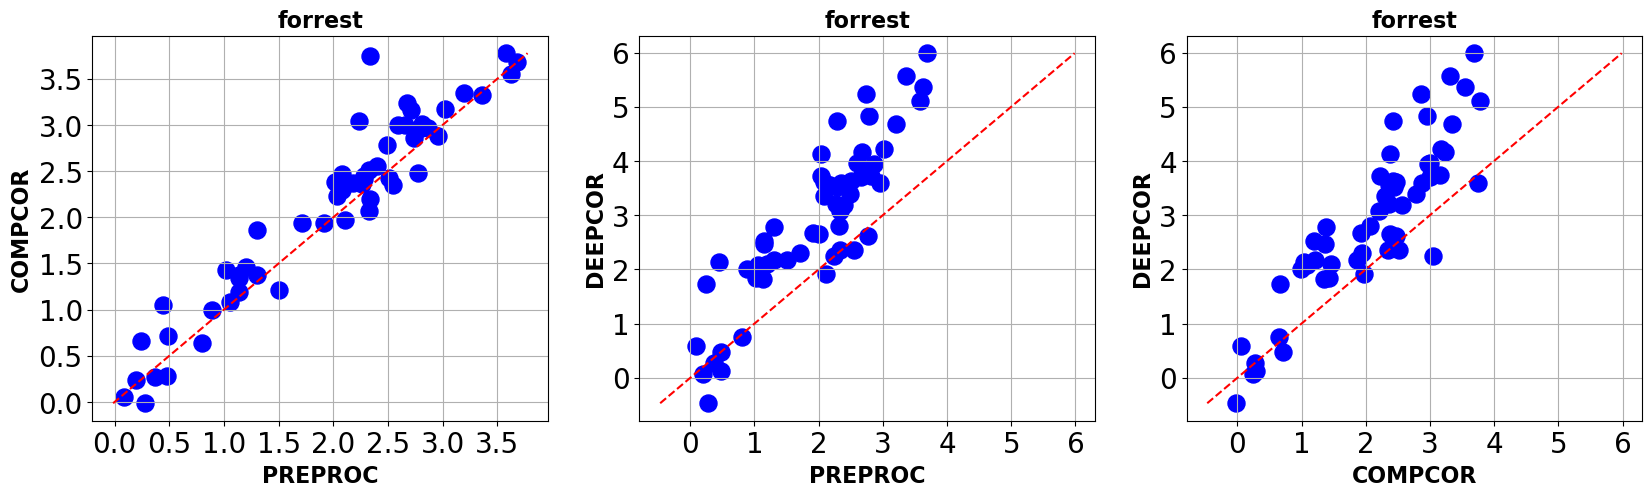

In [190]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plot_scatter(res_forrest['contrast_avg_preproc'].flatten(),res_forrest['contrast_avg_compcor'].flatten(),xlabel='PREPROC',ylabel='COMPCOR',title='forrest')
plt.subplot(1,3,2)
plot_scatter(res_forrest['contrast_avg_preproc'].flatten(),res_forrest['contrast_avg_deepcor_gen_v2'].flatten(),xlabel='PREPROC',ylabel='DEEPCOR',title='forrest')
plt.subplot(1,3,3)
plot_scatter(res_forrest['contrast_avg_compcor'].flatten(),res_forrest['contrast_avg_deepcor_gen_v2'].flatten(),xlabel='COMPCOR',ylabel='DEEPCOR',title='forrest')

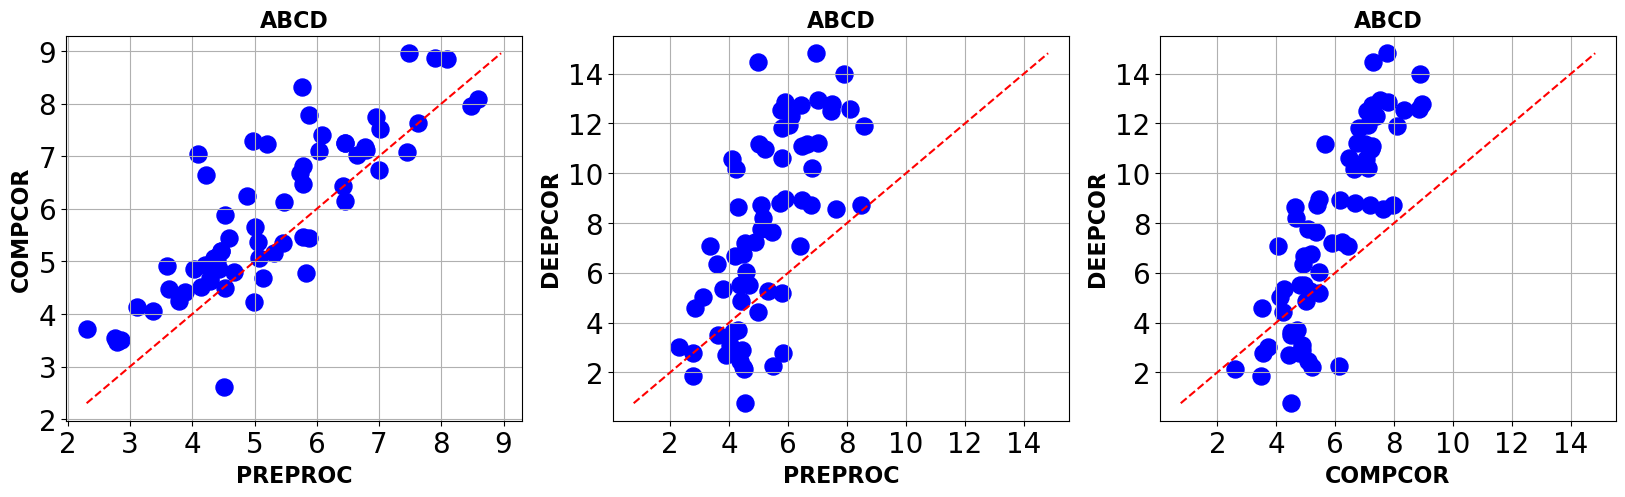

In [194]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plot_scatter(res_ABCD['contrast_avg_preproc'].flatten(),res_ABCD['contrast_avg_compcor'].flatten(),xlabel='PREPROC',ylabel='COMPCOR',title='ABCD')
plt.subplot(1,3,2)
plot_scatter(res_ABCD['contrast_avg_preproc'].flatten(),res_ABCD['contrast_avg_deepcor_gen_v2'].flatten(),xlabel='PREPROC',ylabel='DEEPCOR',title='ABCD')
plt.subplot(1,3,3)
plot_scatter(res_ABCD['contrast_avg_compcor'].flatten(),res_ABCD['contrast_avg_deepcor_gen_v2'].flatten(),xlabel='COMPCOR',ylabel='DEEPCOR',title='ABCD')

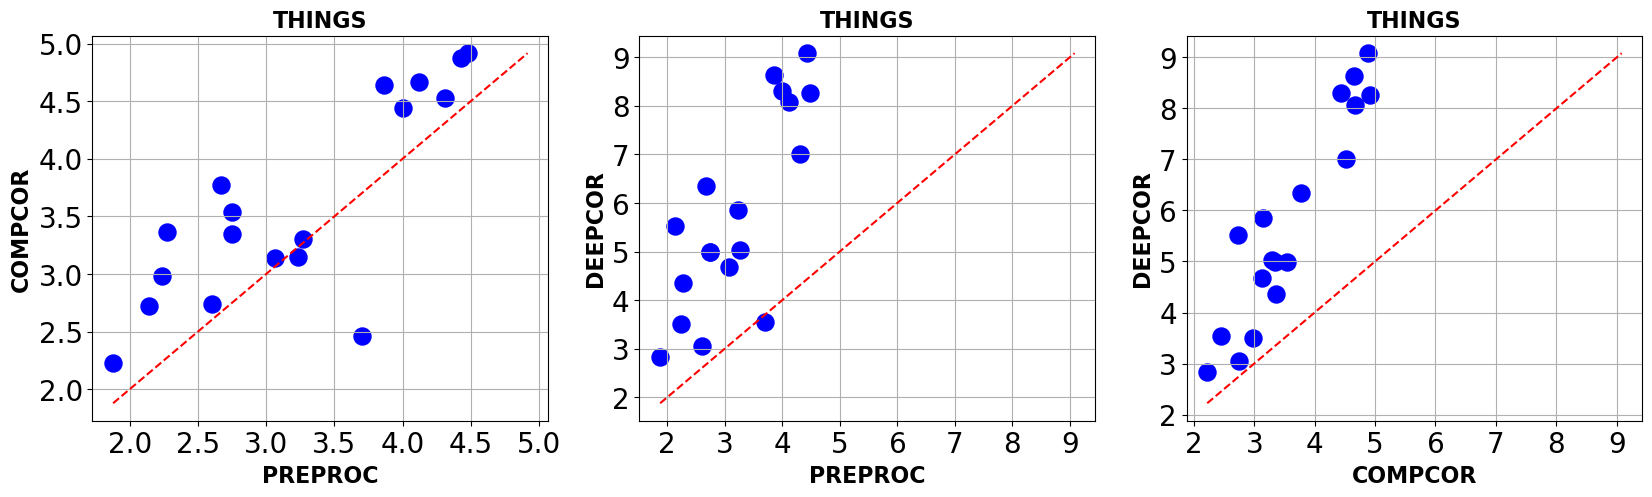

In [193]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plot_scatter(res_things['contrast_avg_preproc'].flatten(),res_things['contrast_avg_compcor'].flatten(),xlabel='PREPROC',ylabel='COMPCOR',title='THINGS')
plt.subplot(1,3,2)
plot_scatter(res_things['contrast_avg_preproc'].flatten(),res_things['contrast_avg_deepcor_gen_v2'].flatten(),xlabel='PREPROC',ylabel='DEEPCOR',title='THINGS')
plt.subplot(1,3,3)
plot_scatter(res_things['contrast_avg_compcor'].flatten(),res_things['contrast_avg_deepcor_gen_v2'].flatten(),xlabel='COMPCOR',ylabel='DEEPCOR',title='THINGS')

In [ ]:
v1 = np.array([res_forrest['contrast_face_deepcor_gen_v2'],res_forrest['contrast_place_deepcor_gen_v2']]).mean(axis=0).mean(axis=0)
v2 = np.array([res_forrest['contrast_face_compcor'],res_forrest['contrast_place_compcor']]).mean(axis=0).mean(axis=0)
pretty_ttest_rel(v1,v2,ttl='',alternative='two-sided')
print(v1.mean().round(2))

v1 = np.array([res_ABCD['contrast_face_deepcor_gen_v2'],res_ABCD['contrast_place_deepcor_gen_v2']]).mean(axis=0).mean(axis=0)
v2 = np.array([res_ABCD['contrast_face_compcor'],res_ABCD['contrast_place_compcor']]).mean(axis=0).mean(axis=0)
pretty_ttest_rel(v1,v2,ttl='',alternative='two-sided')
print(v1.mean().round(2))

v1 = np.array([res_things['contrast_face_deepcor_gen_v2'],res_things['contrast_place_deepcor_gen_v2']]).mean(axis=0).mean(axis=0)
v2 = np.array([res_things['contrast_face_compcor'],res_things['contrast_place_compcor']]).mean(axis=0).mean(axis=0)
pretty_ttest_rel(v1,v2,ttl='',alternative='two-sided')
print(v1.mean().round(2))

In [179]:
v1 = np.array([res_forrest['contrast_face_deepcor_gen_v2'],res_forrest['contrast_place_deepcor_gen_v2']]).mean(axis=0).mean(axis=0)
v2 = np.array([res_forrest['contrast_face_compcor'],res_forrest['contrast_place_compcor']]).mean(axis=0).mean(axis=0)
pretty_ttest_rel(v1,v2,ttl='',alternative='two-sided')
print(v1.mean().round(2))

v1 = np.array([res_ABCD['contrast_face_deepcor_gen_v2'],res_ABCD['contrast_place_deepcor_gen_v2']]).mean(axis=0).mean(axis=0)
v2 = np.array([res_ABCD['contrast_face_compcor'],res_ABCD['contrast_place_compcor']]).mean(axis=0).mean(axis=0)
pretty_ttest_rel(v1,v2,ttl='',alternative='two-sided')
print(v1.mean().round(2))

v1 = np.array([res_things['contrast_face_deepcor_gen_v2'],res_things['contrast_place_deepcor_gen_v2']]).mean(axis=0).mean(axis=0)
v2 = np.array([res_things['contrast_face_compcor'],res_things['contrast_place_compcor']]).mean(axis=0).mean(axis=0)
pretty_ttest_rel(v1,v2,ttl='',alternative='two-sided')
print(v1.mean().round(2))

ΔM=0.81, t(13) = 5.86 , p < .001
2.93
ΔM=1.87, t(32) = 4.38 , p < .001
7.74
ΔM=2.18, t(2) = 3.17 , p = 0.0869
5.78


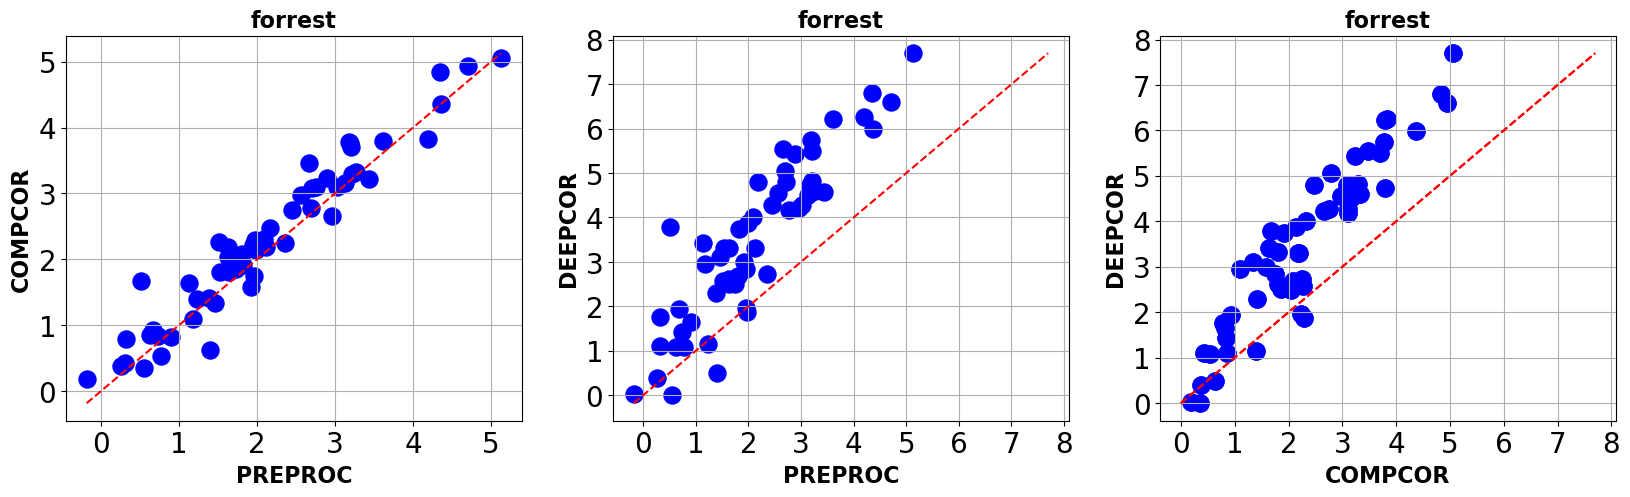

In [176]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plot_scatter(res_forrest['contrast_place_preproc'].flatten(),res_forrest['contrast_place_compcor'].flatten(),xlabel='PREPROC',ylabel='COMPCOR',title='forrest')
plt.subplot(1,3,2)
plot_scatter(res_forrest['contrast_place_preproc'].flatten(),res_forrest['contrast_place_deepcor_gen_v2'].flatten(),xlabel='PREPROC',ylabel='DEEPCOR',title='forrest')
plt.subplot(1,3,3)
plot_scatter(res_forrest['contrast_place_compcor'].flatten(),res_forrest['contrast_place_deepcor_gen_v2'].flatten(),xlabel='COMPCOR',ylabel='DEEPCOR',title='forrest')

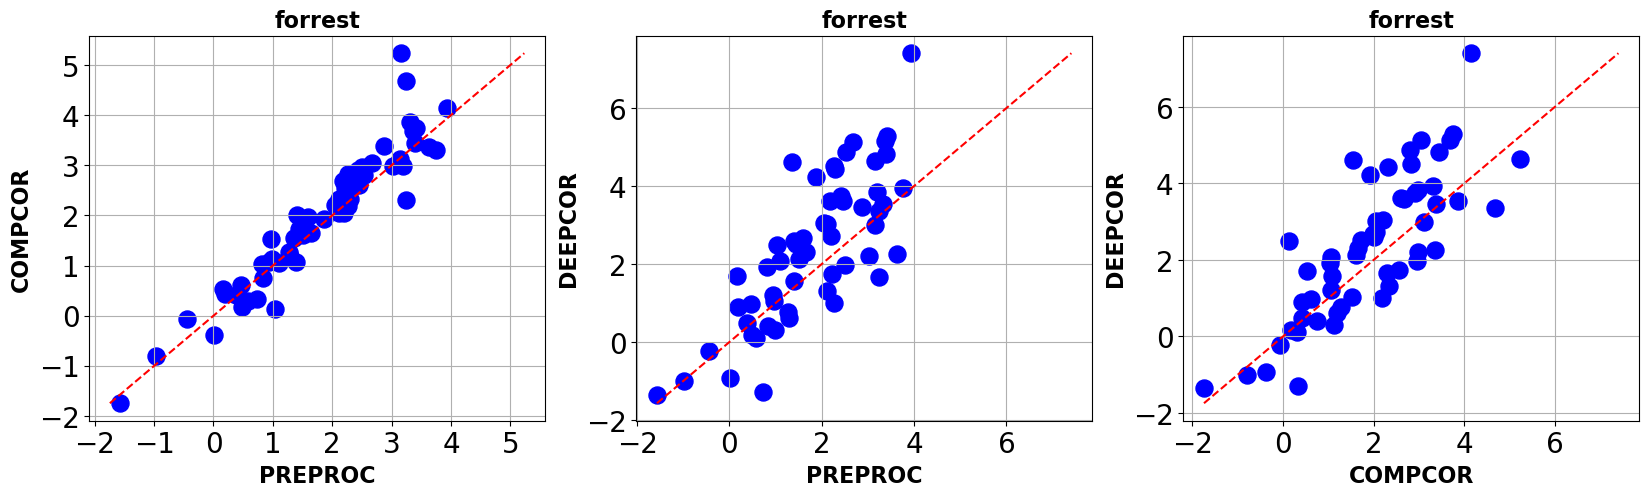

In [178]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plot_scatter(res_forrest['contrast_face_preproc'].flatten(),res_forrest['contrast_face_compcor'].flatten(),xlabel='PREPROC',ylabel='COMPCOR',title='forrest')
#plot_scatter(res_forrest['contrast_place_preproc'].flatten(),res_forrest['contrast_place_compcor'].flatten(),xlabel='PREPROC',ylabel='COMPCOR',title='forrest')
plt.subplot(1,3,2)
plot_scatter(res_forrest['contrast_face_preproc'].flatten(),res_forrest['contrast_face_deepcor_gen_v2'].flatten(),xlabel='PREPROC',ylabel='DEEPCOR',title='forrest')
plt.subplot(1,3,3)
plot_scatter(res_forrest['contrast_face_compcor'].flatten(),res_forrest['contrast_face_deepcor_gen_v2'].flatten(),xlabel='COMPCOR',ylabel='DEEPCOR',title='forrest')

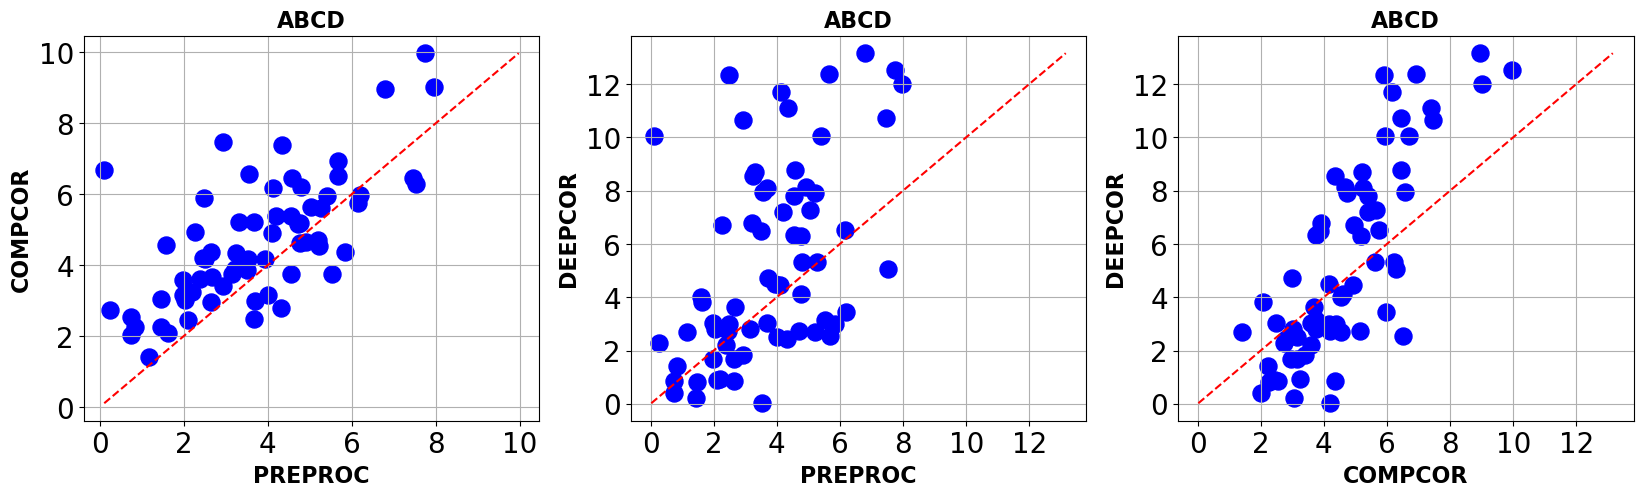

In [173]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plot_scatter(res_ABCD['contrast_face_preproc'].flatten(),res_ABCD['contrast_face_compcor'].flatten(),xlabel='PREPROC',ylabel='COMPCOR',title='ABCD')
plt.subplot(1,3,2)
plot_scatter(res_ABCD['contrast_face_preproc'].flatten(),res_ABCD['contrast_face_deepcor_gen_v2'].flatten(),xlabel='PREPROC',ylabel='DEEPCOR',title='ABCD')
plt.subplot(1,3,3)
plot_scatter(res_ABCD['contrast_face_compcor'].flatten(),res_ABCD['contrast_face_deepcor_gen_v2'].flatten(),xlabel='COMPCOR',ylabel='DEEPCOR',title='ABCD')




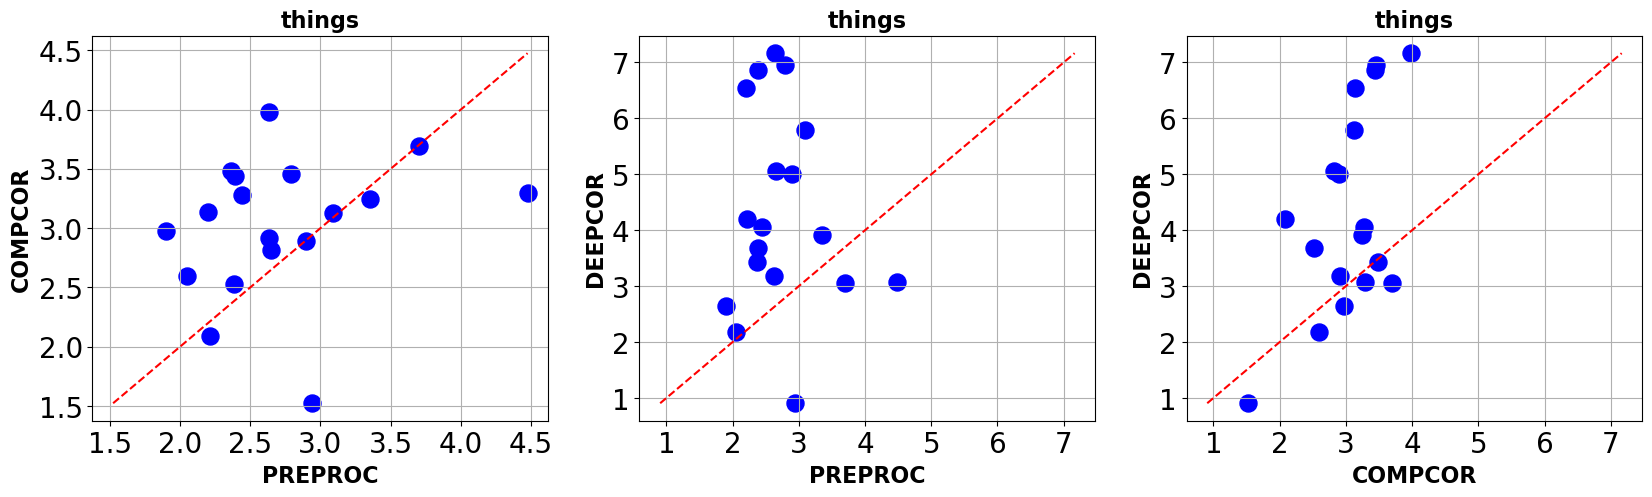

In [174]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plot_scatter(res_things['contrast_face_preproc'].flatten(),res_things['contrast_face_compcor'].flatten(),xlabel='PREPROC',ylabel='COMPCOR',title='things')
plt.subplot(1,3,2)
plot_scatter(res_things['contrast_face_preproc'].flatten(),res_things['contrast_face_deepcor_gen_v2'].flatten(),xlabel='PREPROC',ylabel='DEEPCOR',title='things')
plt.subplot(1,3,3)
plot_scatter(res_things['contrast_face_compcor'].flatten(),res_things['contrast_face_deepcor_gen_v2'].flatten(),xlabel='COMPCOR',ylabel='DEEPCOR',title='things')

In [11]:
import pandas as pd
data = {
    "No Denoising":      [1.79, 3.73, 2.73, 2.12, 6.83, 3.69],
    "CompCor":           [1.93, 4.67, 3.03, 2.30, 7.09, 4.17],
    "DeNN":              [-0.06, -0.03, 0.00, 0.01, 0.00, -0.12],
    "DeepCor-Adv":       [1.81, 4.16, 3.14, 2.30, 8.73, 4.26],
    "DeepCor-Adv-large": [1.72, 4.04, 3.00, 2.19, 8.46, 4.02],
    "DeepCor-Gen-v1":    [1.92, 3.80, 3.45, 2.87, 8.64, 6.38],
    "DeepCor-Gen-v2":    [2.36, 5.30, 4.35, 3.50, 10.19, 7.24],
}

# Create MultiIndex for columns
columns = pd.MultiIndex.from_product(
    [["Face Selectivity (FFA)", "Place Selectivity (PPA)"],
     ["Forrest", "ABCD", "Things"]],
    names=["", ""]
)

# Convert dict to DataFrame
df = pd.DataFrame(data).T
df.columns = columns

df

Face Selectivity (FFA)              Place Selectivity (PPA)  \
                                 Forrest  ABCD Things                 Forrest   
No Denoising                        1.79  3.73   2.73                    2.12   
CompCor                             1.93  4.67   3.03                    2.30   
DeNN                               -0.06 -0.03   0.00                    0.01   
DeepCor-Adv                         1.81  4.16   3.14                    2.30   
DeepCor-Adv-large                   1.72  4.04   3.00                    2.19   
DeepCor-Gen-v1                      1.92  3.80   3.45                    2.87   
DeepCor-Gen-v2                      2.36  5.30   4.35                    3.50   

                                 
                    ABCD Things  
No Denoising        6.83   3.69  
CompCor             7.09   4.17  
DeNN                0.00  -0.12  
DeepCor-Adv         8.73   4.26  
DeepCor-Adv-large   8.46   4.02  
DeepCor-Gen-v1      8.64   6.38  
DeepCor-Gen-v2     10.19   7.24

In [15]:
res_forrest['contrast_face_preproc'].mean()

1.7927631842238563